# Test machine learning models for predicting median snowline elevations using terrain parameters

Helpful links!

- https://scikit-learn.org/stable/tutorial/index.html
- https://scikit-learn.org/stable/tutorial/basic/tutorial.html
- https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
- https://medium.com/analytics-vidhya/how-to-use-google-colab-with-github-via-google-drive-68efb23a42d

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold
import os

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
import sys
import joblib

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [2]:
# !pip install geopandas #Installation format for packages not included with Google Colab.

In [3]:
# If using Google Colab, mount Google Drive so you can access the files in this folder
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

In [4]:
# Uncomment the line below to locate the snow-cover-mapping-application folder in your Drive using os.listdir()
#os.listdir('drive/MyDrive/Research/PhD/snow_cover_mapping/snow_cover_mapping_application/snow-cover-mapping-application/')
# os.listdir('/content/drive/MyDrive/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/terrain-parameters/')

In [5]:
# -----Define paths in directory
# ALEXANDRA'S PATH TO SNOW-COVER-MAPPING-APPLICATION
# base_path = '/content/drive/MyDrive/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/snow-cover-mapping-application'
# RAINEY'S PATH TO SNOW-COVER-MAPPING-APPLICATION
base_path = '/Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/snow-cover-mapping-application/'

# ALEXANDRA'S PATH TO DATA:
# path_to_folder = ('/content/drive/MyDrive/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/terrain-parameters/')
# Remote Sensing Project Path to Data:
#path_to_folder = ('/content/drive/Shareddrives/GEOG361_Final_Project/')

# RAINEY'S PATH TO DATA:
path_to_folder = os.path.join(base_path, 'inputs-outputs')

# -----Add path to functions and load
sys.path.insert(1, os.path.join(base_path, 'functions'))
import model_analyze_utils as f

## Load training data from file

In [6]:
#fn = 'Totalsite_terrainparameters.csv'  # file name
fn = ('ELA_training_data.csv')
# fn = ('Totalsite_terrainparameters.csv') # <--This file doesn't have snow cover observations, just terrain parameters
df = pd.read_csv(os.path.join(path_to_folder, fn))

# format 'datetime' column as pandas.datetimes (no datetime column in terrain parameters CSVs)
df['datetime'] = pd.to_datetime(df['datetime'], format='mixed')
df

,site_name,datetime,snowlines_coords_X,snowlines_coords_Y,HorizontalCRS,VerticalCRS,snowline_elevs_m,snowline_elevs_median_m,SCA_m2,AAR,...,Status,Connect,Form,TermType,Surging,glacier_outline,CRS,HorizontalReference,VerticalReference,study_site
0,Blue,2017-09-28 13:19:53,"[448333.69516140706, 448328.68107815855, 44832...","[5294435.935183713, 5294440.949266962, 5294445...",EPSG:32610,EGM96 geoid (EPSG:5773),"[1966.4131146157317, 1961.951334851081, 1969.0...",1744.4713,2527478.0,0.430286,...,0,0,0,0,0,POLYGON ((-123.69207798899998 47.8272871070000...,NaN,NaN,NaN,NaN
1,Blue,2016-09-27 13:08:14,"[448998.5091932549, 449013.54111762665, 449058...","[5296286.811462927, 5296271.779538555, 5296166...",EPSG:32610,EGM96 geoid (EPSG:5773),"[1560.9210390147555, 1560.9210390147555, 1574....",1763.2753,1581711.2,0.368034,...,0,0,0,0,0,POLYGON ((-123.69207798899998 47.8272871070000...,NaN,NaN,NaN,NaN
2,Blue,2018-10-13 13:20:21,"[448268.5120791764, 448258.48391267937, 448253...","[5294380.780267979, 5294380.780267979, 5294385...",EPSG:32610,EGM96 geoid (EPSG:5773),"[2027.3465551065644, 2030.1171467398906, 2030....",1962.0972,2279688.0,0.388101,...,0,0,0,0,0,POLYGON ((-123.69207798899998 47.8272871070000...,NaN,NaN,NaN,NaN
3,Blue,2019-08-29 13:21:17,"[448519.2162416019, 448509.1880751049, 448504....","[5294461.005599955, 5294461.005599955, 5294466...",EPSG:32610,EGM96 geoid (EPSG:5773),"[1879.80322536625, 1883.1595878348567, 1878.96...",1929.1422,2530997.8,0.430885,...,0,0,0,0,0,POLYGON ((-123.69207798899998 47.8272871070000...,NaN,NaN,NaN,NaN
4,Blue,2022-10-02 13:21:11,"[448830.0894030095, 448820.0612365125, 448815....","[5294260.442270015, 5294260.442270015, 5294265...",EPSG:32610,EGM96 geoid (EPSG:5773),"[1865.4368260658425, 1866.7513349668682, 1866....",2002.0227,2216031.0,0.377607,...,0,0,0,0,0,POLYGON ((-123.69207798899998 47.8272871070000...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,SouthCascade,2019-07-22 13:11:13,"[644215.0, 644205.0, 644200.0, 644200.0, 64420...","[5358060.0, 5358060.0, 5358065.0, 5358075.0, 5...",NaN,NaN,"[1785.0, 1783.0, 1783.0, 1783.0, 1782.0, 1780....",1781.5000,1550100.0,0.861454,...,0,0,0,0,0,POLYGON ((-121.07246183899997 48.3568376590000...,EPSG:32610,NaN,NaN,NaN
766,SouthCascade,2018-07-24 18:00:00,"[643716.0, 643716.0, 643716.0, 643717.5, 64371...","[5358373.5, 5358370.5, 5358367.5, 5358366.0, 5...",NaN,NaN,"[1738.0, 1739.0, 1739.0, 1739.0, 1740.0, 1740....",1757.0000,1690065.0,0.939122,...,0,0,0,0,0,POLYGON ((-121.07246183899997 48.3568376590000...,EPSG:32610,NaN,NaN,NaN
767,SouthCascade,2020-07-26 13:11:14,"[643715.0, 643710.0, 643710.0, 643705.0, 64370...","[5358250.0, 5358255.0, 5358265.0, 5358270.0, 5...",NaN,NaN,"[1764.0, 1764.0, 1765.0, 1765.0, 1765.0, 1763....",1747.0000,1746500.0,0.970008,...,0,0,0,0,0,POLYGON ((-121.07246183899997 48.3568376590000...,EPSG:32610,NaN,NaN,NaN
768,Wolverine,2021-08-29 15:18:32,"[393515.0, 393510.0, 393505.0, 393500.0, 39349...","[6698580.0, 6698585.0, 6698590.0, 6698585.0, 6...",NaN,NaN,"[1242.0, 1242.0, 1244.0, 1244.0, 1246.0, 1283....",1256.5000,8578800.0,0.557412,...,0,0,0,0,9,POLYGON ((-148.93629700399998 60.4085156910000...,EPSG:32606,NaN,NaN,NaN


## Define which columns to use as X (predictive features) and y (output labels)

In [7]:
# Feel free to adjust and play around with this
training_columns = ['Area', 'Zmed', 'Slope', 'Aspect', 'Lmax']
training_columns_display = ['Area', 'Z$_{med}$', 'Slope', 'Aspect', 'L$_{max}$']
label = ['AAR']

## Define supervised machine learning models to test


Feel free to use more or less! See the [SciKitLearn Classifier comparison page](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) for more models, etc.

In [8]:
# Classifier names
model_names = [
  "Linear Regression",
    "Random Forest Regression",
    "Decision Tree Regression",
    "Support Vector Regression",
    "Gradient Boosting Regression",
    "Ridge Regression"

]

# models
models = [
    LinearRegression(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    SVR(),
    GradientBoostingRegressor(),
    Ridge()
]


## Determine best (most accurate) model for training data

In [9]:
out_path = os.path.join(base_path, 'inputs-outputs')
best_model_fn = 'best_model_ELAs.joblib'
save_performances = True
performances_fn = 'ELA_model_performances.csv'
best_model_retrained, X, y = f.determine_best_model(df, models, model_names, training_columns,
                                                    label, out_path, best_model_fn, save_performances, performances_fn)


Linear Regression
    Mean absolute error = 0.1523394720940678
Random Forest Regression


/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-

    Mean absolute error = 0.10447474686163476
Decision Tree Regression
    Mean absolute error = 0.10594678780191324
Support Vector Regression


/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-

    Mean absolute error = 0.15468711618080846
Gradient Boosting Regression


/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-

    Mean absolute error = 0.10632938792242948
Ridge Regression
    Mean absolute error = 0.1523396590342047
 
Performances for all models saved to file: /Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/snow-cover-mapping-application/inputs-outputs/ELA_model_performances.csv
Most accurate classifier: Random Forest Regression
Mean absolute error =  0.10447474686163476
Most accurate model retrained and saved to file: /Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/snow-cover-mapping-application/inputs-outputs/best_model_ELAs.joblib


## Assess perturbation feature importances for best model

/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/raineyaberle/opt/anaconda3/envs/snow-cover-mapping/lib/python3.11/site-

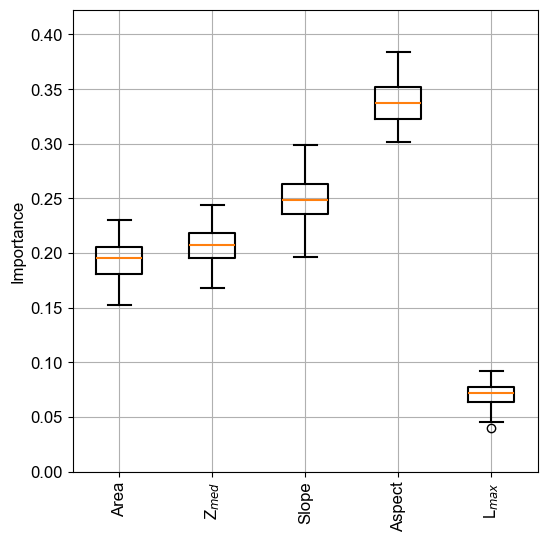

importances data frame saved to file: /Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/snow-cover-mapping-application/inputs-outputs/best_model_ELAs_feature_importances.csv
figure saved to file: /Users/raineyaberle/Google Drive/My Drive/Research/CryoGARS-Glaciology/Advising/student-research/Alexandra-Friel/snow_cover_mapping_application/snow-cover-mapping-application/figures/best_model_ELAs_feature_importances.png


In [10]:
figure_out_path = os.path.join(base_path, 'figures')
figure_fn = 'best_model_ELAs_feature_importances.png'
importances_fn = 'best_model_ELAs_feature_importances.csv'
feature_importances = f.assess_model_feature_importances(best_model_retrained, X, y, training_columns, training_columns_display,
                                                         out_path, importances_fn, figure_out_path, figure_fn)


In [ ]:

# models = [
#     LinearRegression(),
#     RandomForestRegressor(),
#     DecisionTreeRegressor(),
#     SVR(),
#     GradientBoostingRegressor(),
#     Ridge()
# ]

# model_names = [
#     "Linear Regression",
#     "Random Forest Regression",
#     "Decision Tree Regression",
#     "Support Vector Regression",
#     "Gradient Boosting Regression",
#     "Ridge Regression"
# ]

# for name, model in zip(model_names, models):
#     scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
#     mean_score = -scores.mean()
#     print(f"{name}: Mean Squared Error - {mean_score}")

# param_grid = [
#     {},
#     {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]},
#     {'max_depth': [None, 5, 10]},
#     {'kernel': ['linear', 'rbf'], 'C': [1, 10, 100]},
#     {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.05, 0.01]},
#     {'alpha': [0.1, 1.0, 10.0]}
# ]

# best_models = []
# for name, model, params in zip(model_names, models, param_grid):
#     grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
#     grid_search.fit(X, y)
#     best_model = grid_search.best_estimator_
#     best_models.append(best_model)
#     print(f"Best parameters for {name}: {grid_search.best_params_}")

# best_model_scores = []
# for name, best_model in zip(model_names, best_models):
#     scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_squared_error')
#     mean_score = -scores.mean()
#     best_model_scores.append(mean_score)
#     print(f"{name} with best parameters: Mean Squared Error - {mean_score}")

# best_model_index = best_model_scores.index(min(best_model_scores))
# best_model_name = model_names[best_model_index]
# print(f"The best model is: {best_model_name} with MSE of {best_model_scores[best_model_index]}")







In [ ]:
# -----Determine unique subregions and number of sites in each subregion
df[['O1Region', 'O2Region']] = df[['O1Region', 'O2Region']].astype(float)
df = df.sort_values(by=['O1Region', 'O2Region']).reset_index(drop=True)
# grab unique site names with their O1 and O2 regions
unique_sites = df[['site_name', 'O1Region', 'O2Region']].drop_duplicates()
# count number of sites in each unique O1 and O2 region combination
unique_subregion_counts = unique_sites[['O1Region', 'O2Region']].value_counts().reset_index(name='count')
# sort by subregion number
unique_subregion_counts = unique_subregion_counts.sort_values(by=['O1Region', 'O2Region'])
# save just the unique subregion values
unique_subregions = unique_subregion_counts[['O1Region', 'O2Region']].values
# print unique subregions and site counts
unique_subregion_counts

In [ ]:
# -----Define a function for determining subregion name and color for plotting
def determine_subregion_name_color(o1, o2):
    if (o1 == 1.0) and (o2 == 1.0):
        subregion_name, color = 'Brooks Range', 'c'
    elif (o1 == 1.0) and (o2 == 2.0):
        subregion_name, color = 'Alaska Range', '#1f78b4'
    elif (o1 == 1.0) and (o2 == 3.0):
        subregion_name, color = 'Aleutians', '#6d9c43'
    elif (o1 == 1.0) and (o2 == 4.0):
        subregion_name, color = 'W. Chugach Mtns.', '#264708'
    elif (o1 == 1.0) and (o2 == 5.0):
        subregion_name, color = 'St. Elias Mtns.', '#fb9a99'
    elif (o1 == 1.0) and (o2 == 6.0):
        subregion_name, color = 'N. Coast Ranges', '#e31a1c'
    elif (o1 == 2.0) and (o2 == 1.0):
        subregion_name, color = 'N. Rockies', '#cab2d6'
    elif (o1 == 2.0) and (o2 == 2.0):
        subregion_name, color = 'N. Cascades', '#fdbf6f'
    elif (o1 == 2.0) and (o2 == 3.0):
        subregion_name, color = 'C. Rockies', '#9657d9'
    elif (o1 == 2.0) and (o2 == 4.0):
        subregion_name, color = 'S. Cascades', '#ff7f00'
    elif (o1 == 2.0) and (o2 == 5.0):
        subregion_name, color = 'S. Rockies', '#6a3d9a'
    else:
        subregion_name = 'O1:' + o1 + ' O2:' + o2
        color = 'k'

    return subregion_name, color

In [ ]:
from sklearn.inspection import permutation_importance

training_columns_only_Zmed = ['Area','Zmed', 'Slope', 'Aspect']
# -----Iterate over unique subregions (O1 and O2 region combinations)
# initialize data table of feature importances
feature_importances_df_full = pd.DataFrame()
i = 0 # loop counter
for o1, o2 in unique_subregions:

    # grab subregion name and color for plotting
    subregion_name, color = determine_subregion_name_color(o1, o2)
    print(subregion_name)

    # subset training data for subregion
    df_subregion = df.loc[(df['O1Region']==o1) & (df['O2Region']==o2)]
    # define X and y
    X_subregion = df_subregion[training_columns_only_Zmed]
    y_subregion = df_subregion[label]
    # convert y to 1D row vector
    y_subregion = np.transpose(y_subregion.values)[0]

    # initialize empty array for storing mean absolute errors
    abs_err_mean = np.zeros(len(names))

    # iterate over ML classifiers
    for j, name, classifier in list(zip(np.arange(0,len(names)), names, classifiers)):

        # train model and estimate feature importances using permutation
        classifier.fit(X_subregion, y_subregion)
        perm = permutation_importance(classifier, X_subregion, y_subregion,
                                      scoring='neg_mean_squared_error')
        # get importances
        feature_importances = perm.importances_mean
        # normalize importances so that they sum to about 1
        feature_importances = feature_importances / np.sum(feature_importances)

        feature_importances_df = pd.DataFrame({'subregion': [subregion_name],
                                               'color': [color],
                                               'model': [name]
                                               })
        for column, importance in list(zip(training_columns_only_Zmed, feature_importances)):
            feature_importances_df[column] = [importance]
        # concatenate to full feature importances df
        feature_importances_df_full = pd.concat([feature_importances_df_full, feature_importances_df])

    i += 1 # increase loop counter

feature_importances_df_full.reset_index(drop=True, inplace=True)
feature_importances_df_full

In [ ]:
import seaborn as sns

# -----Plot results by column
# construct dictionary of colors for each subregion
color_dict = dict(feature_importances_df_full[['subregion', 'color']].drop_duplicates().values)
fig, ax = plt.subplots(2, 2, figsize=(14, 8))
ax = ax.flatten()
for i, column in enumerate(training_columns_only_Zmed):
    sns.boxplot(data=feature_importances_df_full, x='subregion', y=column,
                hue='subregion', ax=ax[i], palette=color_dict, width=9)
    ax[i].set_title(column)
    ax[i].set_xlabel('')
    ax[i].set_xticks([])
    ax[i].set_xticklabels([])
    ax[i].set_xlim(-5,13)
    ax[i].set_ylim(-0.1,1.1)
    if i!=3:
        ax[i].get_legend().remove()
    else:
        ax[i].legend(loc='center right', bbox_to_anchor=[1.2, 1.0, 0.2, 0.2])
plt.show()


In [ ]:
# -----Plot results by subregion
# fig, ax = plt.subplots(3, 3, figsize=(14, 8))
# ax = ax.flatten()
# for i, column in enumerate(unique_subregions):

#     sns.boxplot(data=feature_importances_df_full, x='subregion', y=column,
#                 hue='subregion', ax=ax[i], palette=color_dict, width=9)
#     ax[i].set_title(column)
#     ax[i].set_xlabel('')
#     ax[i].set_xticks([])
#     ax[i].set_xticklabels([])
#     ax[i].set_xlim(-5,13)
#     ax[i].set_ylim(-0.1,1.1)
#     if i!=3:
#         ax[i].get_legend().remove()
#     else:
#         ax[i].legend(loc='center right', bbox_to_anchor=[1.2, 1.0, 0.2, 0.2])
# plt.show()

---
---

In [ ]:
#How this works:

#this code performs K-fold cross-validation for multiple classifiers, trains and evaluates the models on each fold, calculates the mean absolute error for each classifier, and displays the performance results.


#abs_err = np.zeros(len(names)): This line creates a NumPy array of zeros with the length equal to the number of classifiers. This array will store the mean absolute error for each classifier.


#for i, (name, clf) in enumerate(zip(names, classifiers)):: This loop iterates over the names and classifiers, which are provided in the names and classifiers variables. The enumerate function is used to get both the index (i) and the corresponding name and classifier.

#num_folds = 10: This line sets the number of folds to 10.
#kfold = KFold(n_splits=num_folds, shuffle=True, random_state=1): This line creates an instance of the KFold class with the specified number of splits, enabling shuffling of the data, and setting a random state for reproducibility.
#abs_err_folds = np.zeros(num_folds): This line creates a NumPy array of zeros with the length equal to the number of folds. This array will store the mean absolute error for each fold.
#j = 0: This line initializes a counter variable j to keep track of the fold number.


#for train_ix, test_ix in kfold.split(X):: This loop iterates over the indices generated by the KFold split on the feature data X. The train_ix and test_ix contain the indices for the training and testing data for each fold, respectively.
#X_train, X_test = X.loc[train_ix], X.loc[test_ix]: This line splits the feature data X into training and testing sets based on the fold indices.
#y_train, y_test = y[train_ix], y[test_ix]: This line splits the target variable y into training and testing sets based on the fold indices.
#Fitting the model and predicting:

#clf.fit(X_train, y_train): This line fits (trains) the classifier model (clf) using the training data.
#y_pred = clf.predict(X_test): This line predicts the outputs for the testing data (X_test) using the trained model.

#abs_err_folds[j] = np.nanmean(np.abs(y_test - y_pred)): This line calculates the mean absolute error for the current fold by taking the absolute difference between the true target values (y_test) and the predicted values (y_pred), and then computing the mean. The result is stored in the abs_err_folds array for the corresponding fold.
#j += 1: This line increments the fold counter.

#abs_err[i] = np.nanmean(abs_err_folds): This line computes the mean of the absolute errors across all folds and assigns it to the abs_err array at the corresponding index (i).


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

training_columns = ['Area', 'Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect']
labels = 'AAR' #If you're using the training_data file, add an 's' after snowline in this line.

X = df[training_columns]
y = df[labels]

clf = RandomForestRegressor()
clf.fit(X, y)

feature_importances = clf.feature_importances_

sorted_indices = sorted(range(len(feature_importances)), key=lambda i: feature_importances[i], reverse=True)
sorted_feature_importances = [feature_importances[i] for i in sorted_indices]
sorted_feature_names = [training_columns[i] for i in sorted_indices]

plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, color=['maroon', 'teal', 'orange', 'pink', 'cyan', 'purple'],edgecolor = 'black')
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation='vertical')

plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Regressor for Study Sites')

plt.show()


NameError: ignored

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt


training_columns = ['Area', 'Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect']
labels = 'AAR'

X = df[training_columns]
y = df[labels]

clf = DecisionTreeRegressor()
clf.fit(X, y)

feature_importances = clf.feature_importances_

sorted_indices = sorted(range(len(feature_importances)), key=lambda i: feature_importances[i], reverse=True)
sorted_feature_importances = [feature_importances[i] for i in sorted_indices]
sorted_feature_names = [training_columns[i] for i in sorted_indices]

plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, color=['maroon', 'teal', 'orange', 'pink', 'cyan', 'purple'], edgecolor = 'black')
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation='vertical')


plt.xlabel('Features')
plt.ylabel('importance')
plt.title('Decision Tree Regressor for Study Sites')

plt.show()




In [ ]:
import pandas as pd
from sklearn.linear_model import Ridge
import numpy as np
import matplotlib.pyplot as plt


labels = 'AAR'

X = df[training_columns]
y = df[labels]

clf = Ridge()
clf.fit(X, y)

coefficients = np.abs(clf.coef_)

sorted_indices = np.argsort(coefficients)[::-1]
sorted_coefficients = coefficients[sorted_indices]
sorted_feature_names = np.array(training_columns)[sorted_indices]

plt.bar(range(len(sorted_coefficients)), sorted_coefficients, color=['maroon', 'teal', 'orange', 'pink', 'cyan', 'purple'], edgecolor = 'black')
plt.xticks(range(len(sorted_coefficients)), sorted_feature_names, rotation='vertical')

plt.xlabel('Terrain Parameters')
plt.ylabel('Absolute values')
plt.title('Ridge Regression for selected study sites')

plt.show()



In [ ]:
# Cross validation is the best way to assess accuracy:
  # - Reduces overfitting: Machine may learn data too well, unable to generalize new data
  # - Cross validation will split the data into multiple folds. Then,  then the avg accuracy of the model across all folds is calculated

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge


training_columns = ['Area', 'Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect']
labels = 'AAR'
X = df[training_columns]
y = df[labels]

random_forest = RandomForestRegressor()
decision_tree = DecisionTreeRegressor()
ridge_regression = Ridge()

random_forest.fit(X, y)
decision_tree.fit(X, y)
ridge_regression.fit(X, y)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

colors = {
    'Area': 'maroon',
    'Zmin': 'pink',
    'Zmax': 'violet',
    'Zmed': 'blue',
    'Slope': 'red',
    'Aspect': 'purple'
}

rf_feature_importances = random_forest.feature_importances_
dt_feature_importances = decision_tree.feature_importances_
ridge_feature_importances = np.abs(ridge_regression.coef_)

sorted_rf_indices = np.argsort(rf_feature_importances)[::-1]
sorted_dt_indices = np.argsort(dt_feature_importances)[::-1]
sorted_ridge_indices = np.argsort(ridge_feature_importances)[::-1]

sorted_rf_feature_importances = rf_feature_importances[sorted_rf_indices]
sorted_dt_feature_importances = dt_feature_importances[sorted_dt_indices]
sorted_ridge_feature_importances = ridge_feature_importances[sorted_ridge_indices]

sorted_training_columns = np.array(training_columns)[sorted_rf_indices]

axs[0].bar(range(len(sorted_rf_feature_importances)), sorted_rf_feature_importances, color=[colors[column] for column in sorted_training_columns], edgecolor = 'black')
axs[0].set_xticks(range(len(sorted_rf_feature_importances)))
axs[0].set_xticklabels(sorted_training_columns, rotation='vertical')
axs[0].set_xlabel('Features')
axs[0].set_ylabel('Importance')
axs[0].set_title('Random Forest Regressor')

axs[1].bar(range(len(sorted_dt_feature_importances)), sorted_dt_feature_importances, color=[colors[column] for column in sorted_training_columns], edgecolor = 'black')
axs[1].set_xticks(range(len(sorted_dt_feature_importances)))
axs[1].set_xticklabels(sorted_training_columns, rotation='vertical')
axs[1].set_xlabel('Features')
axs[1].set_ylabel('Importance')
axs[1].set_title('Decision Tree Regressor')

axs[2].bar(range(len(sorted_ridge_feature_importances)), sorted_ridge_feature_importances, color=[colors[column] for column in sorted_training_columns],edgecolor = 'black')
axs[2].set_xticks(range(len(sorted_ridge_feature_importances)))
axs[2].set_xticklabels(sorted_training_columns, rotation='vertical')
axs[2].set_xlabel('Features')
axs[2].set_ylabel('Importance')
axs[2].set_title('Ridge Regression')

plt.tight_layout()
plt.show()



In [ ]:
#the feature importances are sorted in descending order using np.argsort() with the [::-1] indexing to reverse the order.

In [ ]:
#Make sure that it sorts the name of the variables correctly. Assign colors to each feature in the data set, not just random ones.

#note to self: 2nd subplot is different than figure plotted above, need to fix. (Decision tree)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
import pandas as pd

fn = 'O1_1_terrain_parameters - Sheet1.csv'  # file name

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,

]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # plot data


# COLOR SCHEME BELOW:
    cm = plt.cm.GnBu
    cm_bright = ListedColormap(["#16ab2f", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")

    # Plot training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=(cm_bright), edgecolors="k")

    # Plot testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.8,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

legend_colors = ["g", "b"]
legend_labels = ["True", "False"]
handles = [plt.Line2D([], [], marker='o', color=color, label=label) for color, label in zip(legend_colors, legend_labels)]
plt.legend(handles=handles, loc="center", bbox_to_anchor=(1.2, 0.5))


plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
import pandas as pd

fn = ('ELA_training_data.csv')

X = data[['Area', 'Zmin']].values
y = data['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,

]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # plot data


# COLOR SCHEME BELOW:
    cm = plt.cm.GnBu
    cm_bright = ListedColormap(["#16ab2f", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")

    # Plot training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=(cm_bright), edgecolors="k")

    # Plot testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.8,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

legend_colors = ["g", "b"]
legend_labels = ["True", "False"]
handles = [plt.Line2D([], [], marker='o', color=color, label=label) for color, label in zip(legend_colors, legend_labels)]
plt.legend(handles=handles, loc="center", bbox_to_anchor=(1.2, 0.5))


plt.tight_layout()
plt.show()





In [ ]:

# Extract features and labels
X = df[['Area', 'Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect']]
y = df['Zmin']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classification pipelines
pipelines = [
    make_pipeline(StandardScaler(), MLPClassifier()),
    make_pipeline(StandardScaler(), KNeighborsClassifier()),
    make_pipeline(StandardScaler(), SVC()),
    make_pipeline(StandardScaler(), GaussianProcessClassifier(kernel=RBF())),
    make_pipeline(StandardScaler(), DecisionTreeClassifier()),
    make_pipeline(StandardScaler(), RandomForestClassifier()),
    make_pipeline(StandardScaler(), AdaBoostClassifier()),
    make_pipeline(StandardScaler(), GaussianNB()),
    make_pipeline(StandardScaler(), QuadraticDiscriminantAnalysis()),
]


# Train and evaluate classifiers
scores = []
for pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    scores.append(score)
    print(f"Classifier: {pipeline[-1].__class__.__name__}")
    print(f"Score: {score}")


# Plot decision boundaries
for i, pipeline in enumerate(pipelines):
    ax = plt.subplot(len(pipelines), 2, i + 1)
    DecisionBoundaryDisplay.from_estimator(
        pipeline, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
    )
    ax.set_title(pipeline[-1].__class__.__name__)
# Visualize the results
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5


# Plot data and decision boundaries
ax = plt.subplot(1, 2, 1)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=(cm_bright), edgecolors="k")
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
ax.set_xlim(x_min, x_max)









In [ ]:
#Test the reliability! Run allll cells first.


classifiers = [
    LogisticRegression(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    SVC(),
    GradientBoostingClassifier(),
    RidgeClassifier()
]

names = [
    "Logistic Regression",
    "Random Forest Classifier",
    "Decision Tree Classifier",
    "Support Vector Classifier",
    "Gradient Boosting Classifier",
    "Ridge Classifier"
]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
cross_val_accuracies = []

for classifier in classifiers:
    cross_val_accuracy = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy').mean()*100
    cross_val_accuracies.append(cross_val_accuracy)

    #Test size = percentage of each fold

print("Cross-validated accuracy scores of each classifier: ")
print(" ")
for i in range(len(classifiers)):
    print(f"{names[i]}: {cross_val_accuracies[i]}", "%")




In [ ]:
#Output is weird, need to change it!! SOS
#Run all cells first!


# Modified the for loop. (# Iterate over classifiers: for i, (name, clf) in enumerate(zip(names, classifiers))

#this code performs K-fold cross-validation for multiple classifiers, trains and evaluates the models on each fold, calculates the mean absolute error for each classifier, and displays the performance results.

#k fold will split the data set into equal(ish) parts, then it will be trained and evaluated a certain amount of times.

# Initialize performance metrics
abs_err = np.zeros(len(names)) # absolute error [m]

# Iterate over classifiers
for i, (name, clf) in enumerate(zip(names, classifiers)):
    print(name)

    # Conduct K-Fold cross-validation
    num_folds = 10
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=1)
    abs_err_folds = np.zeros(num_folds) # absolute error for all folds
    j = 0 # fold counter

    # loop through fold indices
    for train_ix, test_ix in kfold.split(X):
        # split data into training and testing using kfold indices
        X_train, X_test = X[train_ix], X[test_ix]
        y_train, y_test = y[train_ix], y[test_ix]

        # fit model to X_train and y_train
        clf.fit(X_train, y_train)

        # predict outputs for X_test values
        y_pred = clf.predict(X_test)

        # calculate performance metrics
        abs_err_folds[j] = np.nanmean(np.abs(y_test - y_pred))
        j += 1

    # take average performance metrics for all folds
    abs_err[i] = np.nanmean(abs_err_folds)

    # display performance results
    print('    Mean absolute error = ' + str(np.round(abs_err[i])) + ' m')
